In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Disordered phases

Define all useful expressions

In [78]:
def U(phi, tau, T, a2, b2, c2, c4, M):
    tau = np.linalg.norm(tau)
    return a2*phi**2 + T * (phi*np.log(phi) + M*(1-phi)*np.log(1-phi)) + b2*tau**2 + T*phi*(c2*(tau/phi)**2 + c4*(tau/phi)**4)

def d2U_dphi2(phi, T, a2, M):   # tau = 0
    return 2*a2 + T*(1/phi + M/(1-phi + 0.000001))

def d2U_dtau2(phi, T, b2, c2): # tau = 0
    return 2*b2 + 2*T*c2/phi

def zeta(k, alpha3, alpha4, phi0, b2, T, c2):
    assert alpha4 > 0, "alpha4 must be positive for stability"
    return alpha3*k**2 + alpha4*k**4 + 1/2 * d2U_dtau2(phi0, T, b2, c2)

def epsilon(k, alpha1, alpha2, alpha3):
    assert alpha2 > 0, "alpha2 must be positive for stability"
    assert alpha1 < 0, "alpha1 must be negative because of repulsiveness of amphiphiles"
    return (alpha1 - alpha3)*k**2 + alpha2*k**4

def p(k, beta1, phi0, T, a2, M):
    assert beta1 > 0, "beta1 must be positive to favour solution uniformity"
    return (beta1*k**2 + 1/2*d2U_dphi2(phi0, T, a2, M))**(-1)

# correlations
def phi_corr(k, **kwargs):
    return p(k, beta1, phi0, T, a2, M) * (zeta(k, alpha3, alpha4, phi0, b2, T, c2) + epsilon(k, alpha1, alpha2, alpha3)) / (zeta(k, alpha3, alpha4, phi0, b2, T, c2) + epsilon(k, alpha1, alpha2, alpha3) - gamma**2/4*k**2*p(k, beta1, phi0, T, a2, M))

def tau_corr(k, **kwargs):
    return 2 / zeta(k, alpha3, alpha4, phi0, b2, T, c2) + 1 / (zeta(k, alpha3, alpha4, phi0, b2, T, c2) + epsilon(k, alpha1, alpha2, alpha3) - gamma**2/4*k**2*p(k, beta1, phi0, T, a2, M))

def tauz_corr(k, theta, **kwargs):
    return 1 / (zeta(k, alpha3, alpha4, phi0, b2, T, c2) + epsilon(k, alpha1, alpha2, alpha3) - gamma**2/4*k**2*p(k, beta1, phi0, T, a2, M)) * (1 + np.sin(theta)**2 / zeta(k, alpha3, alpha4, phi0, b2, T, c2) * (epsilon(k, alpha1, alpha2, alpha3) - gamma**2/4*k**2*p(k, beta1, phi0, T, a2, M)))

def test_corr(k, theta, **kwargs):
    return 1 / zeta(k, alpha3, alpha4, phi0, b2, T, c2) * (1 - np.sin(theta)**2 * (epsilon(k, alpha1, alpha2, alpha3) - gamma**2/4*k**2*p(k, beta1, phi0, T, a2, M)) / (zeta(k, alpha3, alpha4, phi0, b2, T, c2) + epsilon(k, alpha1, alpha2, alpha3) - gamma**2/4*k**2*p(k, beta1, phi0, T, a2, M)))


1.0


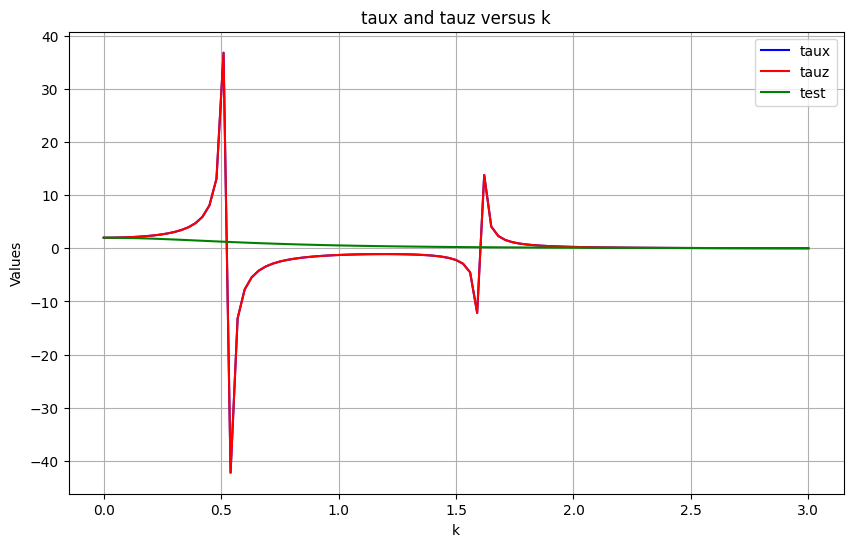

In [80]:
alpha1 = -2
alpha2 = 0.5
alpha3 = 1.1
alpha4 = 0.2
beta1 = 1

phi0 = 1    # pure amphiphile

T, b2, c2 = 1, 0.25, 0.25   # d2U_dtau2 = 1
M = 1
gamma = 1  # arbitrary
a2 = 1

print(d2U_dtau2(phi0, T, b2, c2))
k = np.linspace(0, 3, 101)

taux = tauz_corr(k, theta=0, alpha1=alpha1, alpha2=alpha2, alpha3=alpha3, alpha4=alpha4, beta1=beta1, phi0=phi0, T=T, b2=b2, c2=c2)
taux1 = test_corr(k, theta=0, alpha1=alpha1, alpha2=alpha2, alpha3=alpha3, alpha4=alpha4, beta1=beta1, phi0=phi0, T=T, b2=b2, c2=c2)
tauz = test_corr(k, theta=np.pi/2, alpha1=alpha1, alpha2=alpha2, alpha3=alpha3, alpha4=alpha4, beta1=beta1, phi0=phi0, T=T, b2=b2, c2=c2)

plt.figure(figsize=(10, 6))

plt.plot(k, taux, label='taux', color='blue')
plt.plot(k, tauz, label='tauz', color='red')
plt.plot(k, taux1, label='test', color='green')
'''plt.plot(k, zeta(k, alpha3, alpha4, phi0, b2, T, c2), label='zeta', color='green')
plt.plot(k, epsilon(k, alpha1, alpha2, alpha3), label='epsilon', color='purple')
myvar = zeta(k, alpha3, alpha4, phi0, b2, T, c2) + epsilon(k, alpha1, alpha2, alpha3)
myvar = 1 / myvar
plt.plot(k, myvar, label='zeta + epsilon', color='orange')'''

# Add labels and title
plt.xlabel('k')
plt.ylabel('Values')
plt.title('taux and tauz versus k')
plt.legend()

plt.grid(True)
plt.show()
